In [1]:
from mxnet import ndarray as nd
from mxnet import autograd as ag
from mxnet import gluon

num_train = 20
num_test = 100
num_inputs = 200

/home/dyjng/anaconda3/lib/python3.6/site-packages/urllib3/contrib/pyopenssl.py:46: DeprecationWarning: OpenSSL.rand is deprecated - you should use os.urandom instead
  import OpenSSL.SSL


In [2]:
true_w  = nd.ones((num_inputs, 1)) * 0.01
true_b = 0.05

In [3]:
X = nd.random_normal(shape = (num_train + num_test, num_inputs))
y = nd.dot(X, true_w) + true_b
y += nd.random_normal(shape = y.shape)

X_train, X_test = X[:num_train, :], X[num_train:, :]
y_train, y_test = y[:num_train], y[num_train:]

In [4]:
import random
batch_size = 1
def data_iter(num_examples):
    idx = list(range(num_examples))
    random.shuffle(idx)
    for i in range(0, num_examples, batch_size):
        j = nd.array(idx[i : min(i + batch_size, num_examples)])
        yield X.take(j), y.take(j)

In [5]:
idx = list(range(10))
print(idx)
random.shuffle(idx)
print(idx)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 8, 1, 5, 2, 7, 9, 4, 6, 3]


In [6]:
def get_params():
    w = nd.random_normal(shape = (num_inputs, 1)) * 0.1
    b = nd.zeros((1,))
    for param in (w, b):
        param.attach_grad()
    return(w, b)

In [7]:
def L2_penalty(w, b):
    return (w ** 2).sum() + b  ** 2

In [8]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
import matplotlib.pyplot as plt

def net(X, w, b):
    return nd.dot(X, w) + b

def square_loss(yhat, y):
    return (yhat - y.reshape(yhat.shape)) ** 2

def SGD(params, lr):
    for param in params:
        param[:] = param - lr * param.grad

def test(params, X, y):
    return square_loss(net(X, *params), y).mean().asscalar()

def train(lambd):
    epochs = 10
    learning_rate = 0.002
    params = get_params()
    train_loss = []
    test_loss = []
    for e in range(epochs):
        for data, label in data_iter(num_train):
            with ag.record():
                output = net(data, *params)
                loss = square_loss(output, label) \
                    + lambd * L2_penalty(*params)
            loss.backward()
            SGD(params, learning_rate)
        train_loss.append(test(params, X_train, y_train))
        test_loss.append(test(params, X_test, y_test))
    plt.plot(train_loss)
    plt.plot(test_loss)
    plt.legend(['train', 'test'])
    plt.show()
    return 'learned w[:10]', params[0][:10], 'learned b:', params[1]

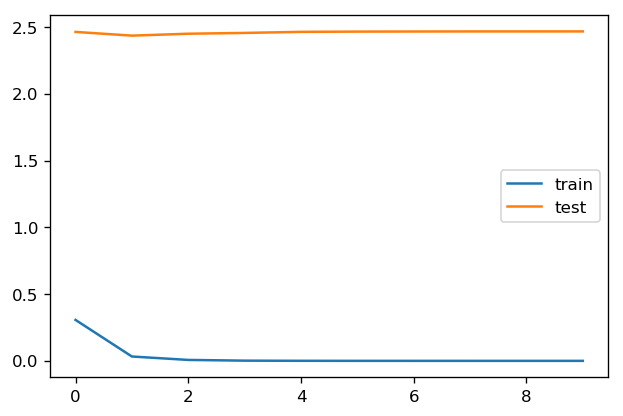

('learned w[:10]', 
 [[ 0.0560524 ]
  [ 0.0404381 ]
  [ 0.05623856]
  [ 0.02395287]
  [ 0.07904179]
  [ 0.13874879]
  [-0.06801169]
  [-0.14662121]
  [-0.09932613]
  [ 0.03398426]]
 <NDArray 10x1 @cpu(0)>, 'learned b:', 
 [-0.01482864]
 <NDArray 1 @cpu(0)>)

In [9]:
train(0)

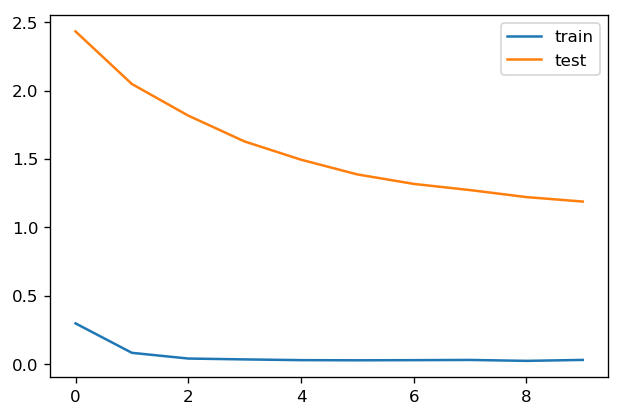

('learned w[:10]', 
 [[ 0.0295907 ]
  [-0.01126486]
  [-0.00646557]
  [ 0.04460588]
  [ 0.01111737]
  [ 0.06808715]
  [ 0.00637227]
  [-0.00319364]
  [ 0.00103571]
  [-0.04733755]]
 <NDArray 10x1 @cpu(0)>, 'learned b:', 
 [ 0.01431562]
 <NDArray 1 @cpu(0)>)

In [10]:
train(2)